In [1]:
# To use this boilerplate, make sure to attend to:
#
#   Fourth Cell (Markdown)
#
#       The header - are you writing a function, or...?
#
#   Fifth Cell (Python Code)
#
#       Are all comments necessary? 
#       Are you really showcasing your knowledge of Python/data analysis with the code as written--did you do your due diligence?
#       "It works" is not "It is understood," and "It is understood" is not "It is strong" or "It is best."
#       If it feels like an amateurish solution, there's a good 70% chance it is.
#       If it feels like a professional solution, there's a good 30% chance it isn't.
#
#   Cell 6+ (Python Code or Markdown)
#
#       Do all test cells have headers?
#       Are all test cells commented?
#       Does your testing reasonably capture use cases and/or misuse cases?
#       Are cells with variable declarations sensible and/or even necessary?
#       Did you delete any unused/scratchpaper cells?





# DID YOU DELETE THIS CELL?


# Data Analysis in Python

## Curriculum Project 3

### from [FreeCodeCamp.org](https://www.freecodecamp.org)


### [Click here for an Overview of Project Requirements](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer)


In [32]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


## Project Exercises:


### Import the data, add a calculated column, "normalize" a few columns (really, just clamp them to binary values using a specific threshhold).

In [3]:
# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
# *** Weight in kg / (height in meters)^2
# *** >25 is overweight
# *** map the resulting boolean series to 0s and 1s as per project instructions
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).map({True: 1, False: 0})

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].map({0: 0, 1: 0, 2: 1, 3: 1})
df['gluc'] = df['gluc'].map({1: 0, 2: 1, 3: 1})

### Function for drawing a Seaborn catplot of the data:

<Figure size 640x480 with 0 Axes>

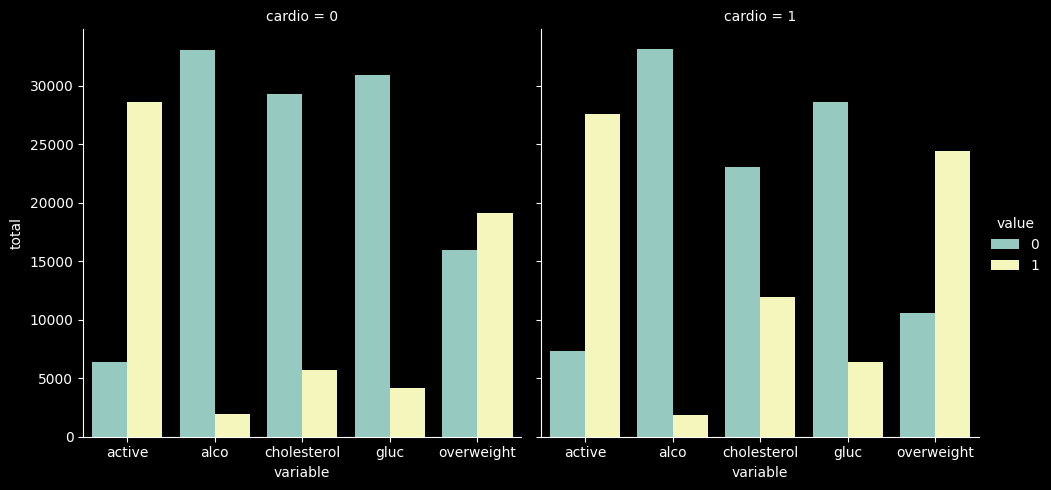

<Figure size 640x480 with 0 Axes>

In [4]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'
    # *** You want to melt it by 'cardio' as well to accomplish the next step.
    df_cat = pd.melt(df.filter(['cholesterol', 'gluc', 'alco', 'active', 'overweight', 'cardio']), id_vars=['cardio'])
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    # *** The direction in the comment directly above is vague and misleading:
    # *** you have to rename one of the columns merely to meet the close-to-arbitrary exercise requirements... 
    # *** ...rather than "for the catplot to work correctly."
    df_cat = df_cat.value_counts(sort=False).to_frame().reset_index()
    df_cat = df_cat.rename(columns={0: 'total'})
    
    # Draw the catplot with 'sns.catplot()'
    sns.catplot(df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')

    # Get the figure for the output
    fig = plt.figure()


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

### Function for drawing a Seaborn heatmap of the data:

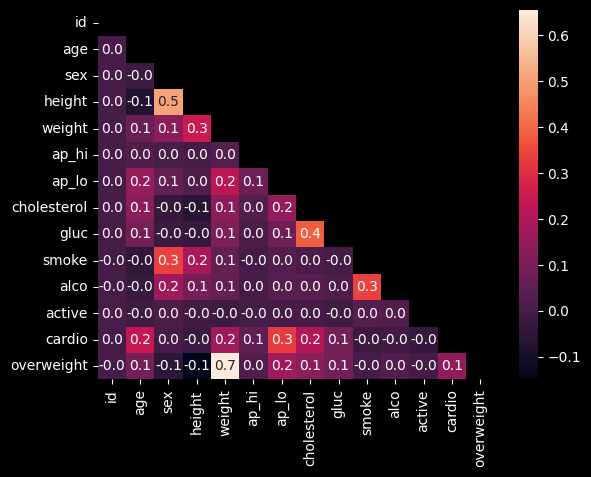

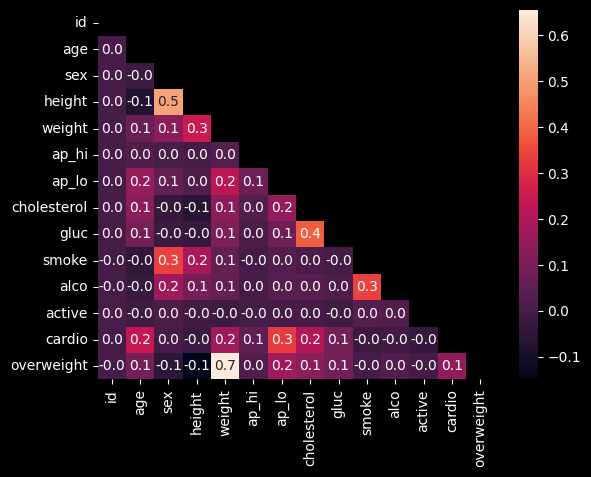

In [90]:


# Draw Heat Map
def draw_heat_map():
    

    # Clean the data
    # *** only use data where ap-lo <= ap-hi
    # *** trim the outliers from height and weight (below the 2.5 percentile or above 97.5 percentile)
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) 
    & (df['height'] >= df['height'].quantile(0.025)) 
    & (df['height'] <= df['height'].quantile(0.975)) 
    & (df['weight'] >= df['weight'].quantile(0.025)) 
    & (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones(corr.shape)).astype(bool)[0:14, 0:14]
    corr = corr.mask(mask)


    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with 'sns.heatmap()'

    ax = sns.heatmap(corr, annot=True, fmt=".1f")

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()

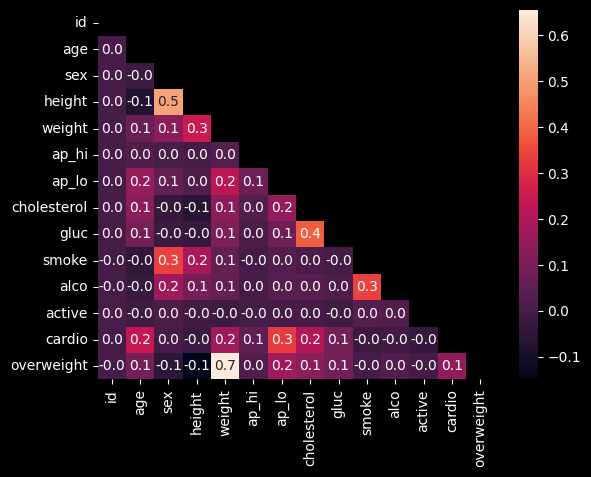

In [89]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) 
& (df['height'] >= df['height'].quantile(0.025)) 
& (df['height'] <= df['height'].quantile(0.975)) 
& (df['weight'] >= df['weight'].quantile(0.025)) 
& (df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones(corr.shape)).astype(bool)[0:14, 0:14]
corr = corr.mask(mask)

fig = plt.figure()

sns.heatmap(corr, annot=True, fmt=".1f")

    # Do not modify the next two lines
fig.savefig('heatmap.png')
